In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import string
from PIL import Image
import numpy as np
from collections import Counter

In [43]:
RAW_PATH = "../data/raw/"
CLEANED_PATH = "../data/cleaned/"

df = pd.read_csv(os.path.join(RAW_PATH, 'captions.txt'))

In [44]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [45]:
def clean_caption(text):
    # Remover pontuação e aspas
    table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = " ".join(text.translate(table).split()).lower()
    # Remover palavras com números e espaços extras
    words = [word for word in text.split() if word.isalpha()]
    return " ".join(words)

In [46]:
# Aplicar a limpeza
df['caption_clean'] = df['caption'].apply(clean_caption)

# Juntar Legendas e Imagens (Criar o caminho completo)
# Verifique se sua pasta se chama 'data' ou 'flickr8k_dataset'
image_path = os.path.join(RAW_PATH, 'Images')

# Limpar Dados (Remover duplicatas e Nulos conforme solicitado)
df.dropna(subset=['caption_clean'], inplace=True)
df.drop_duplicates(inplace=True)

print(df[['image', 'caption_clean']].head())

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                       caption_clean  
0  a child in a pink dress is climbing up a set o...  
1                a girl going into a wooden building  
2     a little girl climbing into a wooden playhouse  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  


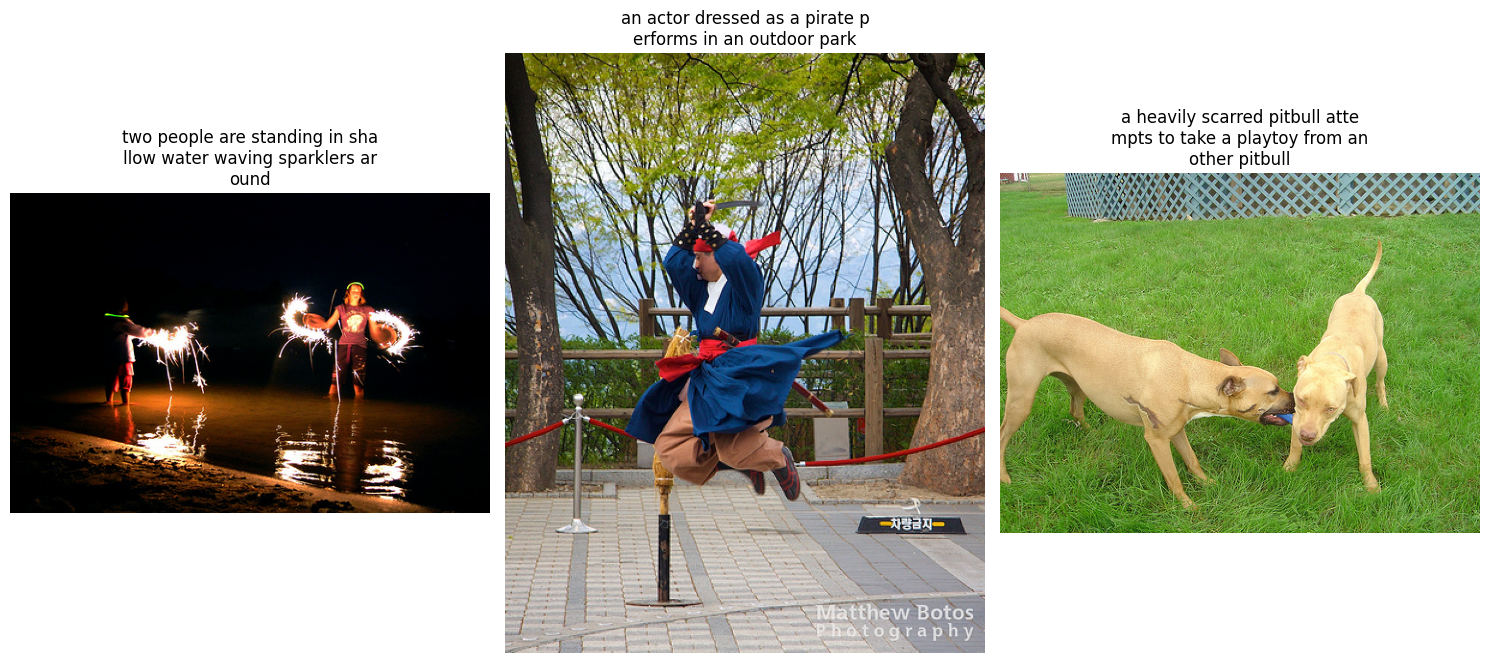

In [47]:
# Selecionar 3 amostras aleatórias
samples = df.sample(3)

plt.figure(figsize=(15, 10))

for i, (index, row) in enumerate(samples.iterrows()):
    plt.subplot(1, 3, i+1)

    img_path = os.path.join(RAW_PATH, 'Images', row['image'])
    img = Image.open(img_path)
    plt.imshow(img)

    # Adicionar a legenda limpa (com quebra de linha para não cortar)
    title = row['caption_clean']
    wrapped_title = "\n".join([title[i:i+30] for i in range(0, len(title), 30)])
    plt.title(wrapped_title, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [48]:
# Salvar o dataframe processado para uso futuro
# index=False evita que o pandas crie uma coluna extra de números desnecessária
DA

Arquivo 'flickr8k_cleaned_data.csv' salvo com sucesso!


In [49]:
# Teste rápido: ler o que acabamos de salvar
check_df = pd.read_csv(clean_file_path)
print("O arquivo salvo tem", len(check_df), "linhas.")
check_df.head(2)

O arquivo salvo tem 40445 linhas.


,image,caption,caption_clean
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,a girl going into a wooden building
